# Olympic Dataset Analysis (1896-2016)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
data = pd.read_csv(r'D:\EDA\ML project\eda\Olympic eda\athlete_events.csv', encoding = 'latin-1')

# Data description

In [3]:
data.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
# for describing object column

data.describe(include =['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [7]:
data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Cleaning duplicate Values

In [8]:
data.duplicated().sum()

1385

In [9]:
data.drop_duplicates(inplace = True)

In [10]:
data.duplicated().sum()

0

# Visualization

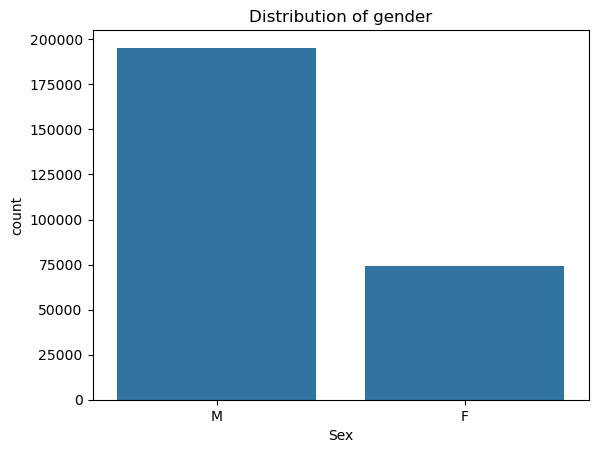

In [11]:
sns.countplot(data = data, x = 'Sex')
plt.title('Distribution of gender')
plt.show()

Observation : Men atheletes are more participating in olympics rather than women.

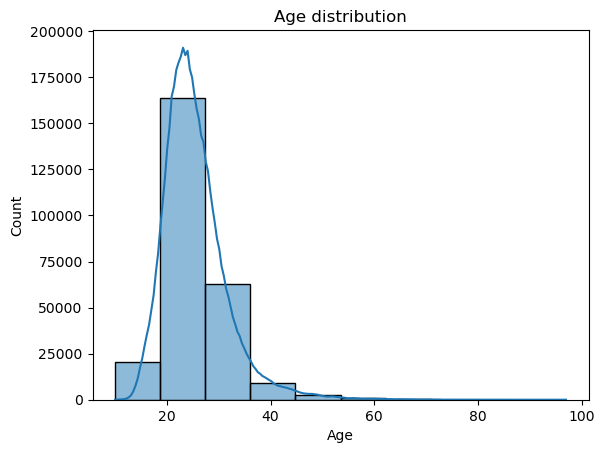

In [12]:
sns.histplot(data = data, x= 'Age', bins = 10, kde = True)
plt.title('Age distribution')
plt.show()

Observation : The maximum athelete are 20-30 years old.

Text(0.5, 1.0, 'Height Distribution')

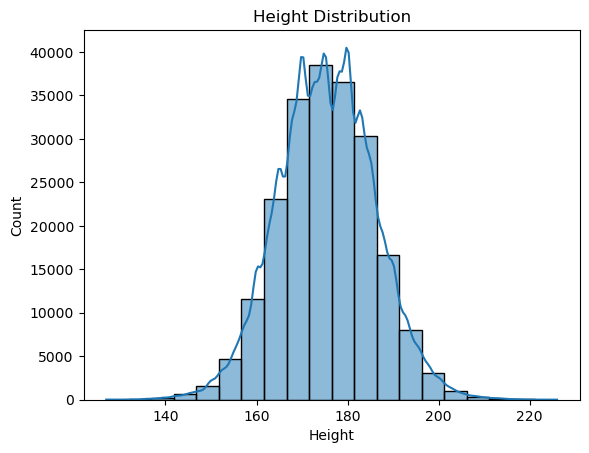

In [13]:
sns.histplot(data = data, x = 'Height', bins =20, kde = True)
plt.title('Height Distribution')

Observation : Most of the atheletes lies between 170 cm to 185 cm Height

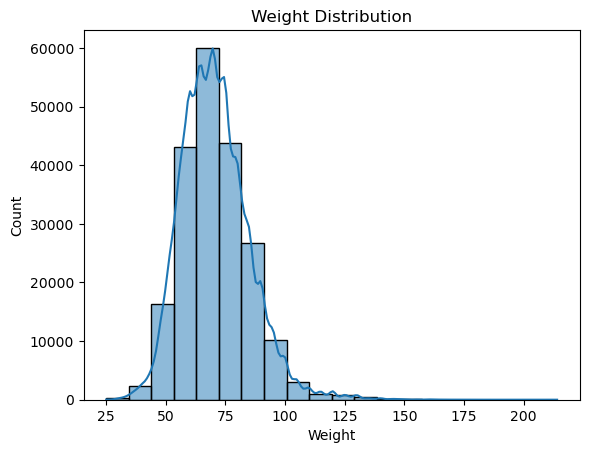

In [14]:
sns.histplot( data = data, kde = True, x= "Weight", bins = 20)
plt.title('Weight Distribution')
plt.show()

Observation : Most of the athelete are 70-75 kg 

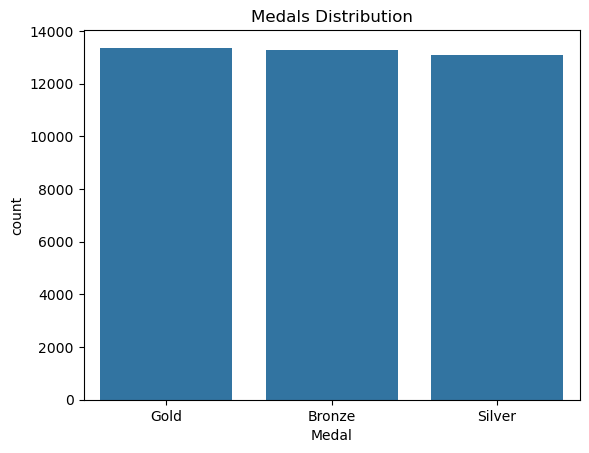

In [15]:
sns.countplot(data = data, x="Medal")
plt.title('Medals Distribution')
plt.show()

Observation : As we know there are 3 medals in olympics all the three are given to athelete but sometimes two athelete wins the same medal that's why the count is vary.

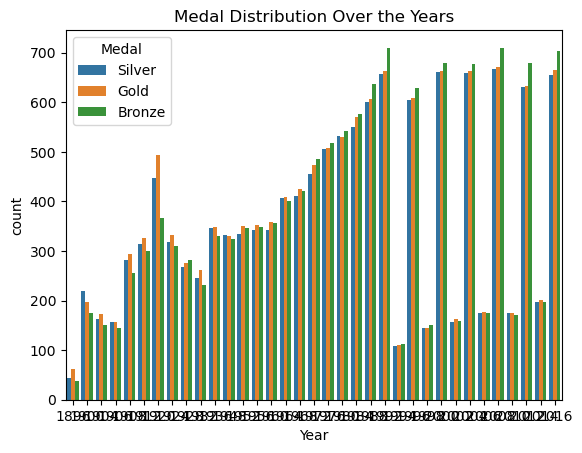

In [16]:
sns.countplot(data = data, x="Year", hue ="Medal")
plt.title('Medal Distribution Over the Years')
plt.show()

# Groupby

In [17]:
year_avg_age = data.groupby('Year')['Age'].mean().sort_values(ascending = False)
year_avg_age

Year
1932    29.586783
1920    29.290978
1900    28.881206
1948    28.386360
1924    28.027535
1928    27.855586
1912    27.538620
1906    27.125253
1908    26.995888
1936    26.952210
1904    26.698150
2016    26.207919
1952    26.161546
2010    26.124262
2014    25.987324
2012    25.961378
2006    25.959151
1956    25.926674
2002    25.916281
2008    25.734118
2004    25.639515
2000    25.422504
1960    25.168848
1998    25.163197
1964    24.944397
1996    24.915045
1994    24.422103
1992    24.318895
1972    24.308607
1968    24.248046
1988    24.079432
1984    23.898347
1976    23.841818
1980    23.694743
1896    23.580645
Name: Age, dtype: float64

In [18]:
sport_median_height = data.groupby('Sport')['Height'].median().sort_values(ascending = False)
sport_median_height.max()

190.0

In [19]:
sport_median_height[sport_median_height == 190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [20]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [21]:
data.Sex

0         M
1         M
2         M
3         M
4         F
         ..
271111    M
271112    M
271113    M
271114    M
271115    M
Name: Sex, Length: 269731, dtype: object

In [22]:
data.NOC

0         CHN
1         CHN
2         DEN
3         DEN
4         NED
         ... 
271111    POL
271112    POL
271113    POL
271114    POL
271115    POL
Name: NOC, Length: 269731, dtype: object

In [23]:
country_gender_count = data.groupby(['NOC','Sex'])['ID'].count()
country_gender_count

NOC  Sex
AFG  F         5
     M       121
AHO  F        12
     M        67
ALB  F        27
            ... 
YUG  M      2201
ZAM  F        19
     M       164
ZIM  F       113
     M       198
Name: ID, Length: 452, dtype: int64

In [24]:
most_medal_winning_country = data.groupby('Medal')['NOC'].max()
most_medal_winning_country

Medal
Bronze    ZIM
Gold      ZIM
Silver    ZIM
Name: NOC, dtype: object

In [25]:
most_gold_winning_country = data[data['Medal']=='Gold'].groupby('NOC')['Medal'].count()
most_gold_winning_country

NOC
ALG      5
ANZ     20
ARG     91
ARM      2
AUS    348
      ... 
UZB     10
VEN      2
VIE      1
YUG    130
ZIM     17
Name: Medal, Length: 109, dtype: int64

In [26]:
data.Year

0         1992
1         2012
2         1920
3         1900
4         1988
          ... 
271111    1976
271112    2014
271113    2014
271114    1998
271115    2002
Name: Year, Length: 269731, dtype: int64

In [27]:
total_femal_winning_gold_year_wise = data[(data['Sex'] == 'F') & (data['Year']==1992)].groupby(['Sex','Year'])['Medal'].count()
total_femal_winning_gold_year_wise

Sex  Year
F    1992    691
Name: Medal, dtype: int64

In [28]:
max_medal_femal_year_wise = data[data['Sex']=='F'].groupby('Year')['Medal'].count().sort_values(ascending = False)
max_medal_femal_year_wise.head(3)

Year
2016    969
2008    932
2012    918
Name: Medal, dtype: int64

In [29]:
country_gold_medals = data.groupby('NOC')['Medal'].count().sort_values(ascending = False)
country_gold_medals.head(3)

NOC
USA    5637
URS    2503
GER    2165
Name: Medal, dtype: int64

In [30]:
highest_total_gold_winning_country_yearly = data[data['Medal'] == 'Gold'].groupby(['NOC','Year'])['Medal'].count().sort_values(ascending = False)
highest_total_gold_winning_country_yearly.head(3)

NOC  Year
URS  1980    205
USA  1984    190
URS  1988    174
Name: Medal, dtype: int64

In [31]:
minimum_total_gold_winning_country_yearly = data[data['Medal'] == 'Gold'].groupby(['NOC','Year'])['Medal'].count().sort_values(ascending = True)
minimum_total_gold_winning_country_yearly.head(3)

NOC  Year
ALG  1992    1
IRL  2012    1
     1992    1
Name: Medal, dtype: int64

In [32]:
female_winning_gold_country_yearly_maximum = data[(data['Medal'] == 'Gold') & (data['Sex'] == 'F')].groupby(['NOC','Sex','Year'])['Medal'].count().sort_values(ascending = False)
female_winning_gold_country_yearly_maximum.head(3)

NOC  Sex  Year
USA  F    2012    103
          1996    100
          2016     85
Name: Medal, dtype: int64

In [33]:
male_winning_gold_country_yearly_maximum = data[(data['Medal'] == 'Gold') & (data['Sex'] == 'M')].groupby(['NOC','Sex','Year'])['Medal'].count().sort_values(ascending = False)
male_winning_gold_country_yearly_maximum.head(3)

NOC  Sex  Year
GBR  M    1908    142
URS  M    1980    137
          1988    133
Name: Medal, dtype: int64

In [34]:
sport_gender_avg_wt = data.groupby(['Sport','Sex'])['Weight'].mean()
sport_gender_avg_wt

Sport          Sex
Aeronautics    M            NaN
Alpine Skiing  F      62.640307
               M      78.626035
Alpinism       F            NaN
               M            NaN
                        ...    
Water Polo     M      87.706172
Weightlifting  F      67.724622
               M      80.251796
Wrestling      F      60.554455
               M      76.400640
Name: Weight, Length: 116, dtype: float64

In [35]:
sport_gender_avg_wt['Wrestling']['F']

60.554455445544555

In [36]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [37]:
sport_max_event_count = data.groupby('Sport')['Event'].count().sort_values(ascending = False).head(5)
sport_max_event_count

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Name: Event, dtype: int64

In [38]:
sport_min_event_count = data.groupby('Sport')['Event'].count().sort_values(ascending = True).head(5)
sport_min_event_count

Sport
Aeronautics       1
Basque Pelota     2
Roque             4
Jeu De Paume     11
Racquets         12
Name: Event, dtype: int64

In [39]:
silver_winner_country_sport_yearly = data[data['Medal']=='Silver'].groupby(['NOC','Sport','Medal'])['Year'].count().sort_values(ascending = False)
silver_winner_country_sport_yearly.head()

NOC  Sport       Medal 
USA  Athletics   Silver    317
     Swimming    Silver    254
     Ice Hockey  Silver    189
AUS  Swimming    Silver    162
ITA  Fencing     Silver    136
Name: Year, dtype: int64

Text(0.5, 1.0, "Top 5 Different events occuring in olympic's")

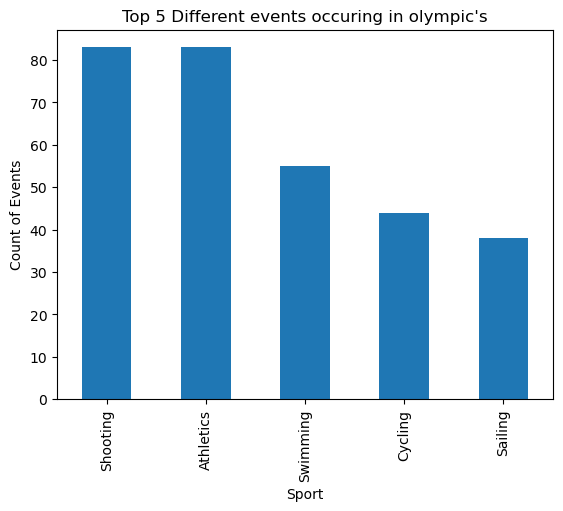

In [40]:
sport_max_event_count = data.groupby('Sport')['Event'].nunique().sort_values(ascending = False).head(5)
sport_max_event_count.plot(kind = 'bar' )
plt.ylabel('Count of Events')
plt.title("Top 5 Different events occuring in olympic's")

In [41]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

Text(0, 0.5, 'Participant Count')

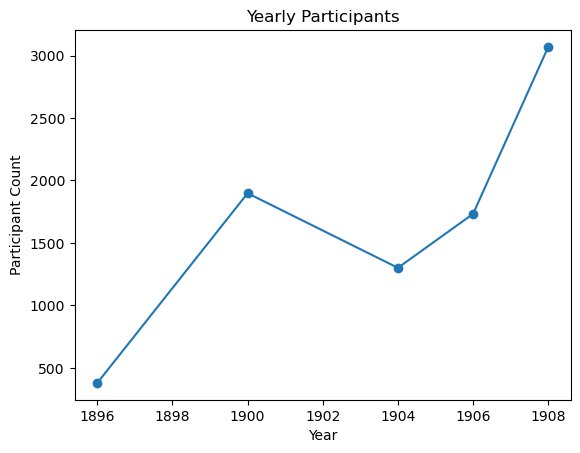

In [42]:
year_wise_participants = data.groupby('Year')['ID'].count().head()
year_wise_participants.plot(kind = 'line', marker = 'o')
plt.title('Yearly Participants')
plt.xlabel('Year')
plt.ylabel('Participant Count')


Text(0, 0.5, 'Participant Count')

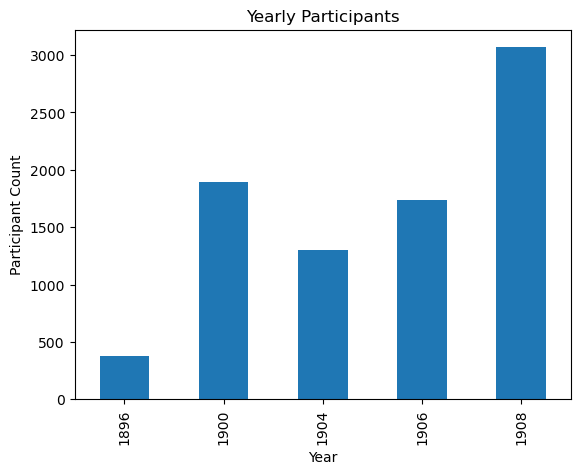

In [43]:
year_wise_participants = data.groupby('Year')['ID'].count().head()
year_wise_participants.plot(kind = 'bar' )
plt.title('Yearly Participants')
plt.xlabel('Year')
plt.ylabel('Participant Count')

In [44]:
avg_age_of_participants = data.groupby('Age')['ID'].mean()
avg_age_of_participants

Age
10.0     71691.000000
11.0     78636.384615
12.0     61667.307692
13.0     62002.556150
14.0     68457.782974
            ...      
81.0     98249.500000
84.0      5146.000000
88.0     31173.000000
96.0     49663.000000
97.0    128719.000000
Name: ID, Length: 74, dtype: float64

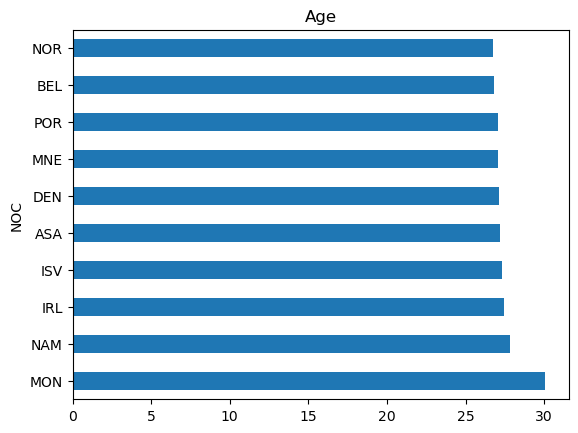

In [45]:
country_avg_age = data.groupby('NOC')['Age'].mean().sort_values(ascending = False)
country_avg_age.head(10).plot(kind = 'barh')
plt.title('Avg of age country wise')
plt.title('Country')
plt.title('Age')
plt.show()

In [46]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

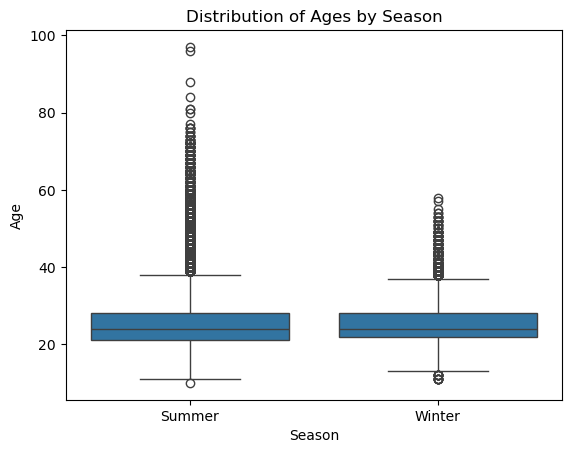

In [47]:
sns.boxplot(data = data, x= 'Season', y = 'Age')
plt.title('Distribution of Ages by Season')
plt.xlabel('Season')
plt.ylabel('Age')
plt.show()

C:\Users\shast\AppData\Local\Temp\ipykernel_12368\2290039475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = data , x = 'Medal', y = 'Height', palette = 'Set2')


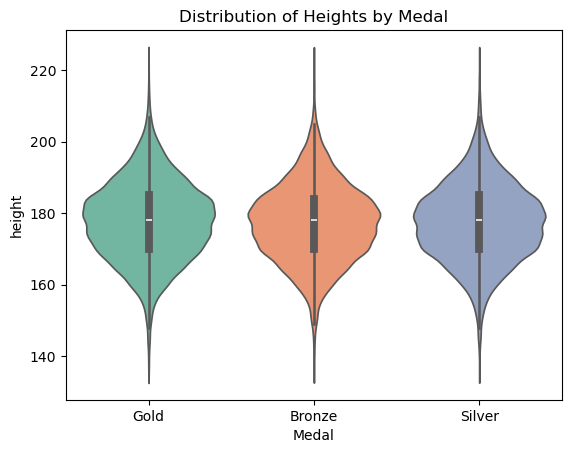

In [48]:
sns.violinplot(data = data , x = 'Medal', y = 'Height', palette = 'Set2')
plt.title('Distribution of Heights by Medal')
plt.xlabel('Medal')
plt.ylabel('height')
plt.show()

In [49]:
most_medals_country = data['NOC'].value_counts().idxmax()
print("Most medal winning country:", most_medals_country)

Most medal winning country: USA


In [50]:
most_medal_country = data.groupby('NOC')['Medal'].count().sort_values(ascending = False).head(1)
most_medal_country

NOC
USA    5637
Name: Medal, dtype: int64

In [51]:
tallest_athelete = data.groupby('NOC')['Height'].max().sort_values(ascending = False).head(1)
tallest_athelete

NOC
CHN    226.0
Name: Height, dtype: float64

In [52]:
tallest_athelete1 = data[data['Height'] == data['Height'].max()]
tallest_athelete1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


In [53]:
print(tallest_athelete1[['ID','Name','Height','Sport']])

            ID      Name  Height       Sport
265040  132627  Yao Ming   226.0  Basketball
265041  132627  Yao Ming   226.0  Basketball
265042  132627  Yao Ming   226.0  Basketball


In [54]:
athelete_highest_wt = data.groupby('Name')['Weight'].max().sort_values(ascending = False).head(1)
athelete_highest_wt

Name
Ricardo Blas, Jr.    214.0
Name: Weight, dtype: float64

In [55]:
heaviest_athelete = data[data['Weight'] == data['Weight'].max()]
print(heaviest_athelete[['ID','Name','Sex',"Sport",'Medal']])

          ID               Name Sex Sport Medal
23155  12177  Ricardo Blas, Jr.   M  Judo   NaN
23156  12177  Ricardo Blas, Jr.   M  Judo   NaN


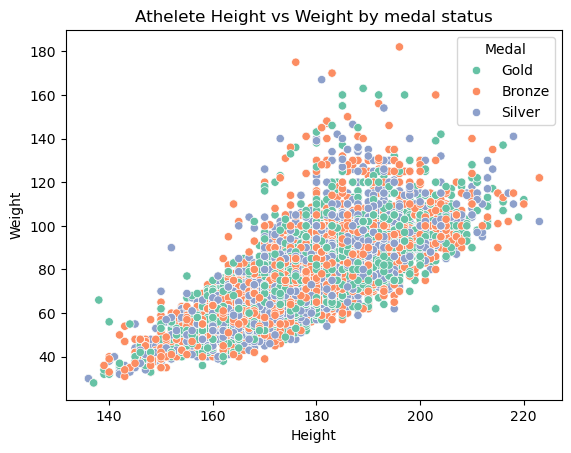

In [56]:
sns.scatterplot(data = data, x = 'Height', y = 'Weight', hue = 'Medal', palette = 'Set2')
plt.title('Athelete Height vs Weight by medal status')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


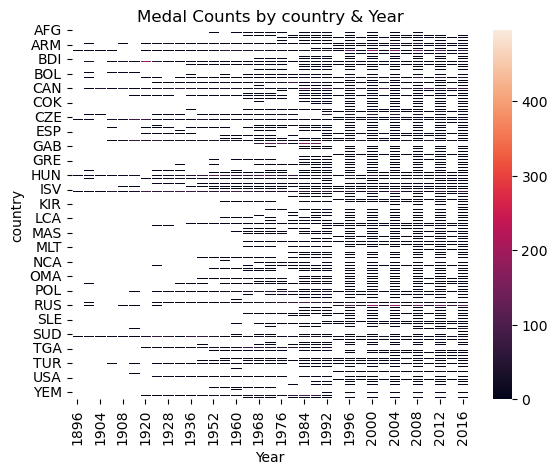

In [57]:
medals_by_country_year = data.pivot_table(index = 'NOC', columns = 'Year', values = 'Medal', aggfunc= 'count')
sns.heatmap(medals_by_country_year, linewidths = 0.5)
plt.title('Medal Counts by country & Year')
plt.xlabel('Year')
plt.ylabel('country')
plt.show()

In [58]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [71]:
data.Year.unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [ ]:

female_counts = data[
    (data['Sex'] == 'F') & (data['Year'].isin([2012, 2016]))
].groupby('Year')['Sex'].count()

count_2012 = female_counts.loc[2012]
count_2016 = female_counts.loc[2016]

absolute_growth = count_2016 - count_2012
percentage_growth = (absolute_growth / count_2012) * 100

print(f"Absolute Growth: {absolute_growth}")
print(f"Percentage Growth: {percentage_growth:.2f}%")

Absolute Growth: 408
Percentage Growth: 7.02%


In [87]:
youngest_athelete = data.groupby(['Name','Height'])['Height'].max().head(1)
youngest_athelete

Name                                     Height
Gabrielle Marie "Gabby" Adcock (White-)  167.0     167.0
Name: Height, dtype: float64

In [100]:
youngest_athelete = data[data['Age'] == data['Age'].min()][:1]
print(youngest_athelete[['Name','Sex','Age','Sport']])

                      Name Sex   Age       Sport
142882  Dimitrios Loundras   M  10.0  Gymnastics
